<a href="https://colab.research.google.com/github/venkatesh1226/CMPE255-DataMining/blob/main/Dimension_reduction_databricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Configure Matplotlib
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Visualising

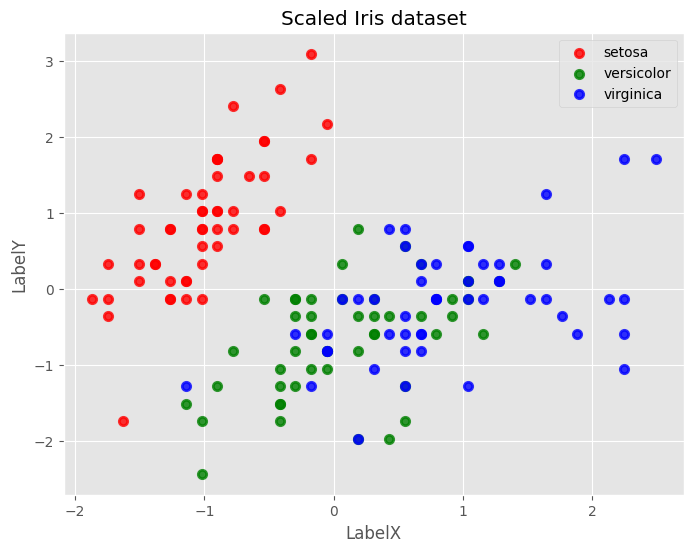

In [4]:

plt.figure(figsize=(8, 6))
for color, i, target_name in zip(['red', 'green', 'blue'], [0, 1, 2], target_names):
    plt.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], color=color, alpha=0.8, lw=2, label=target_name)
plt.title('Scaled Iris dataset')
plt.xlabel('LabelX')
plt.ylabel('LabelY')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

Applying dimesionlity reduction techniques

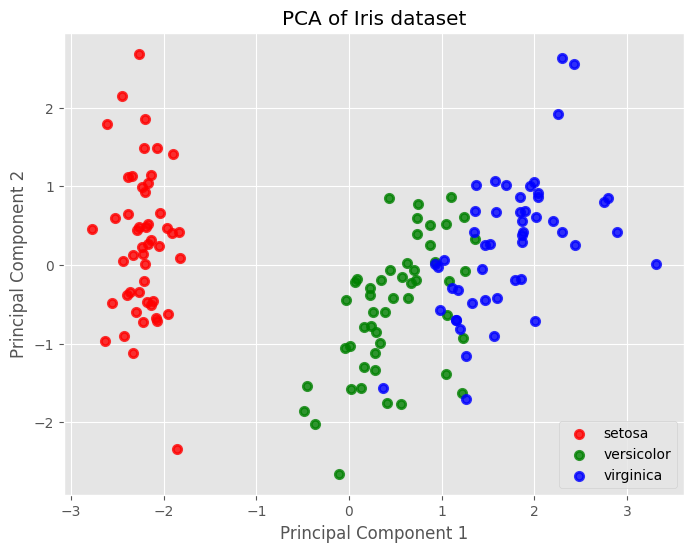

In [5]:
# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizing the PCA results
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(['red', 'green', 'blue'], [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, lw=2, label=target_name)
plt.title('PCA of Iris dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

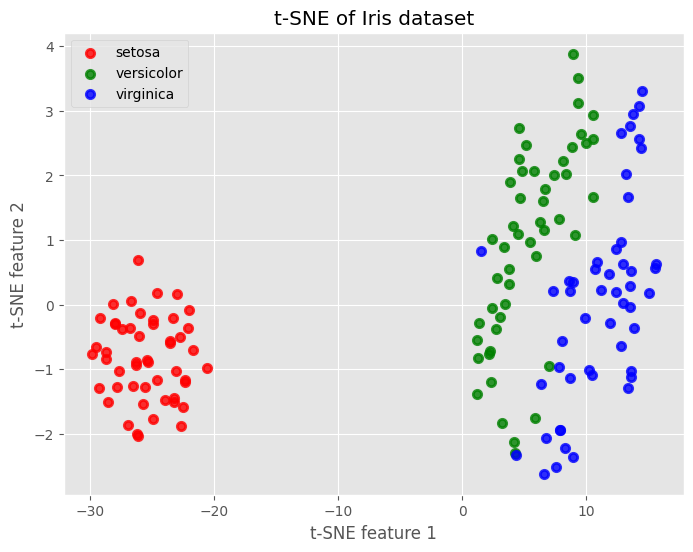

In [6]:
# Applying t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

# Visualizing the t-SNE results
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(['red', 'green', 'blue'], [0, 1, 2], target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], color=color, alpha=0.8, lw=2, label=target_name)
plt.title('t-SNE of Iris dataset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()


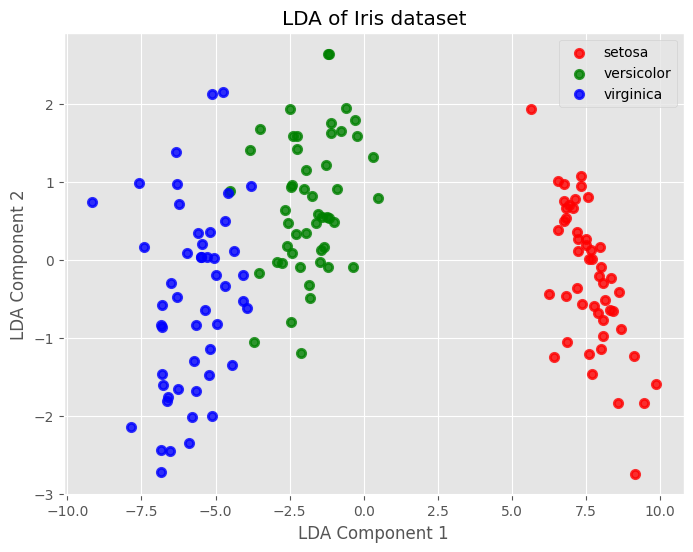

In [7]:
# Applying LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Visualizing the LDA results
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(['red', 'green', 'blue'], [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, alpha=0.8, lw=2, label=target_name)
plt.title('LDA of Iris dataset')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()


In [8]:
# Analysis of PCA Results
print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)


PCA Explained Variance Ratio: [0.72962445 0.22850762]


In [9]:
# Discuss LDA's performance
print("LDA Explained Variance Ratio:", lda.explained_variance_ratio_)


LDA Explained Variance Ratio: [0.9912126 0.0087874]


In [11]:
import plotly.express as px

# PCA for 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# 3D scatter plot for PCA
fig_pca = px.scatter_3d(
    x=X_pca_3d[:, 0], y=X_pca_3d[:, 1], z=X_pca_3d[:, 2],
    color=y, labels={'color': 'Species'},
    title="3D PCA of Iris Dataset"
)
fig_pca.show()
